# Ordinary Least Squares

In this notebook we're going to go thru the calculation of regression line using Ordinary Least Squares (OLS) by hand, as well as calculating the error by hand.

In practice, you would use a library for this day to day, but doing it by hand is useful for your understanding

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
x = np.array([18, 20, 30, 33, 33, 35, 40, 45, 49, 55, 57, 58])
y = np.array([15, 25, 31, 35, 33, 42, 50, 55, 62, 63, 64, 65])

### plot data

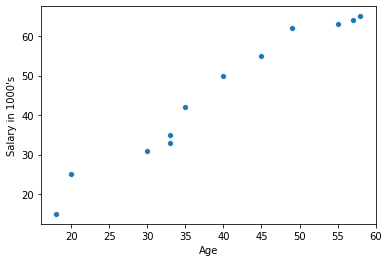

In [4]:
sns.scatterplot(x, y)
plt.xlabel("Age")
plt.ylabel("Salary in 1000's")
plt.show()

### calculate ordinary least squares (by hand)

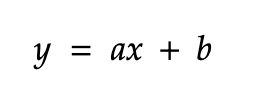


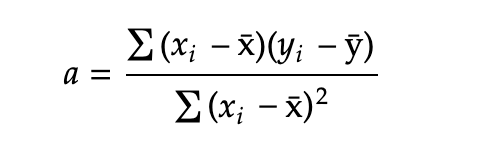

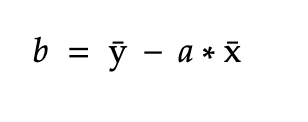

In [23]:
x_mean = np.mean(x)
x_mean

39.416666666666664

In [24]:
x_variance = x - x_mean
x_variance

array([-21.41666667, -19.41666667,  -9.41666667,  -6.41666667,
        -6.41666667,  -4.41666667,   0.58333333,   5.58333333,
         9.58333333,  15.58333333,  17.58333333,  18.58333333])

In [55]:
import pandas as pd
df = pd.DataFrame(data={"x":x,"y":y})
#df['y'] = y
#df['x_variance'] = x_variance
df

,x,y
0,18,15
1,20,25
2,30,31
3,33,35
4,33,33
5,35,42
6,40,50
7,45,55
8,49,62
9,55,63


In [26]:
y_mean = np.mean(y)
y_mean

45.0

In [27]:
y_variance = y - y_mean
df['y_variance'] = y_variance
df

,x,y,x_variance,y_variance
0,18,15,-21.416667,-30.0
1,20,25,-19.416667,-20.0
2,30,31,-9.416667,-14.0
3,33,35,-6.416667,-10.0
4,33,33,-6.416667,-12.0
5,35,42,-4.416667,-3.0
6,40,50,0.583333,5.0
7,45,55,5.583333,10.0
8,49,62,9.583333,17.0
9,55,63,15.583333,18.0


In [28]:
a = np.sum(x_variance * y_variance) / np.sum(np.square(x_variance ))
a

1.2335626755689453

In [29]:
b = y_mean - a*x_mean
b

-3.622928795342588

### Plot the line

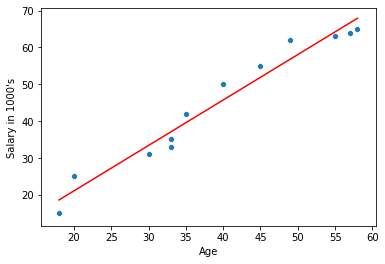

In [30]:
plt.plot(x, a*x + b, color='r')
sns.scatterplot(x, y)
plt.xlabel("Age")
plt.ylabel("Salary in 1000's")
plt.show()

### calculate sum of squared errors (by hand)

In [31]:
y_predict = a*x + b
y_predict

array([18.58119936, 21.04832472, 33.38395147, 37.0846395 , 37.0846395 ,
       39.55176485, 45.71957823, 51.88739161, 56.82164231, 64.22301836,
       66.69014371, 67.92370639])

In [32]:
y - y_predict

array([-3.58119936,  3.95167528, -2.38395147, -2.0846395 , -4.0846395 ,
        2.44823515,  4.28042177,  3.11260839,  5.17835769, -1.22301836,
       -2.69014371, -2.92370639])

In [33]:
error_squared = np.square(y - y_predict)
error_squared

array([12.82498889, 15.61573755,  5.68322462,  4.34572184, 16.68427983,
        5.99385535, 18.32201055,  9.68833102, 26.81538839,  1.49577391,
        7.23687319,  8.54805904])

In [35]:
sum_of_square_errors = np.sum(error_squared)
sum_of_square_errors

133.25424418841342

### Print results

In [37]:
print("Sum of Square Errors: {:.2f}".format(sum_of_square_errors))
print("coefficient (a)", a)
print("intercept (b)", b)

Sum of Square Errors: 133.25
coefficient (a) 1.2335626755689453
intercept (b) -3.622928795342588


## Use sklearn to compute OLS

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x.reshape(-1, 1), y)
y_predict_1 = model.predict(x.reshape(-1, 1))

In [39]:
sum_of_square_errors_1 = np.sum(np.square(y - y_predict_1))
sum_of_square_errors_1

133.25424418841342

In [40]:
print("Sum of Square Errors: {:.2f}".format(sum_of_square_errors_1))
print("coefficient (a)", model.coef_[0])
print("intercept (b)", model.intercept_)

Sum of Square Errors: 133.25
coefficient (a) 1.2335626755689453
intercept (b) -3.622928795342588
